**DATA DIRI**

**NAMA : MUHAMMAD ISMAIL**

**DOMISILI : SURABAYA, JAWA TIMUR**

**PREDICTIVE ANALYTICS PROJECT**

#Import Libraries dan Dataset

In [300]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [301]:
url = "https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/tx-housing.csv"
texasHouses = pd.read_csv(url)
texasHouses

,city,year,month,sales,volume,median,listings,inventory,date
0,Abilene,2000,1,72.0,5380000.0,71400.0,701.0,6.3,2000.000000
1,Abilene,2000,2,98.0,6505000.0,58700.0,746.0,6.6,2000.083333
2,Abilene,2000,3,130.0,9285000.0,58100.0,784.0,6.8,2000.166667
3,Abilene,2000,4,98.0,9730000.0,68600.0,785.0,6.9,2000.250000
4,Abilene,2000,5,141.0,10590000.0,67300.0,794.0,6.8,2000.333333
...,...,...,...,...,...,...,...,...,...
8597,Wichita Falls,2015,3,152.0,16716584.0,89200.0,818.0,6.8,2015.166667
8598,Wichita Falls,2015,4,129.0,15482194.0,105300.0,760.0,6.4,2015.250000
8599,Wichita Falls,2015,5,174.0,19188181.0,100000.0,776.0,6.4,2015.333333
8600,Wichita Falls,2015,6,143.0,18820752.0,118800.0,770.0,6.2,2015.416667


In [302]:
texasHouses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8602 entries, 0 to 8601
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       8602 non-null   object 
 1   year       8602 non-null   int64  
 2   month      8602 non-null   int64  
 3   sales      8034 non-null   float64
 4   volume     8034 non-null   float64
 5   median     7986 non-null   float64
 6   listings   7178 non-null   float64
 7   inventory  7135 non-null   float64
 8   date       8602 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 605.0+ KB


In [303]:
texasHouses.shape

(8602, 9)

In [304]:
texasHouses.isnull().sum()

city            0
year            0
month           0
sales         568
volume        568
median        616
listings     1424
inventory    1467
date            0
dtype: int64

#EDA

In [305]:
texasHouses.describe()

,year,month,sales,volume,median,listings,inventory,date
count,8602.000000,8602.000000,8034.000000,8.034000e+03,7986.000000,7178.000000,7135.000000,8602.000000
mean,2007.299465,6.406417,549.564600,1.068586e+08,128131.442524,3216.902340,7.174590,2007.750000
std,4.502923,3.441932,1110.737179,2.449337e+08,37359.575317,5968.331072,4.612125,4.498718
min,2000.000000,1.000000,6.000000,8.350000e+05,50000.000000,0.000000,0.000000,2000.000000
25%,2003.000000,3.000000,86.000000,1.084000e+07,100000.000000,682.000000,4.900000,2003.833333
50%,2007.000000,6.000000,169.000000,2.298682e+07,123800.000000,1283.000000,6.200000,2007.750000
75%,2011.000000,9.000000,467.000000,7.512139e+07,150000.000000,2953.750000,8.150000,2011.666667
max,2015.000000,12.000000,8945.000000,2.568157e+09,304200.000000,43107.000000,55.900000,2015.500000


##**WORKING WITH MISSING VALUES**

In [306]:
# texasHouses['listings'] = texasHouses['listings'].fillna(texasHouses['listings'].mean())
# texasHouses['volume'] = texasHouses['volume'].fillna(texasHouses['volume'].mean())
# texasHouses['median'] = texasHouses['median'].fillna(texasHouses['median'].mean())
# texasHouses['inventory'] = texasHouses['inventory'].fillna(texasHouses['inventory'].mean())
# texasHouses['sales'] = texasHouses['sales'].fillna(texasHouses['sales'].median())
texasHouses = texasHouses.loc[(texasHouses[['listings', 'inventory']]!= 0).all(axis=1)]
texasHouses.dropna(subset = ["sales","volume","median","listings","inventory"], inplace=True)
texasHouses.drop(['date'], axis=1, inplace=True)
texasHouses.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,year,month,sales,volume,median,listings,inventory
count,7125.000000,7125.000000,7125.000000,7.125000e+03,7125.000000,7125.000000,7125.000000
mean,2007.912842,6.385404,603.046035,1.182661e+08,130793.291228,3235.423018,7.175425
std,4.548955,3.445283,1164.564098,2.572306e+08,37762.864694,5986.442602,4.614046
min,2000.000000,1.000000,6.000000,8.350000e+05,50000.000000,35.000000,0.800000
25%,2004.000000,3.000000,95.000000,1.221500e+07,102700.000000,687.000000,4.900000
50%,2008.000000,6.000000,187.000000,2.624312e+07,127100.000000,1297.000000,6.200000
75%,2012.000000,9.000000,527.000000,8.963947e+07,152900.000000,2969.000000,8.100000
max,2015.000000,12.000000,8945.000000,2.568157e+09,304200.000000,43107.000000,55.900000


In [307]:
texasHouses.isnull().sum()

city         0
year         0
month        0
sales        0
volume       0
median       0
listings     0
inventory    0
dtype: int64

In [308]:
texasHouses.shape

(7125, 8)

In [309]:
Q1 = texasHouses.quantile(.25)
Q3 = texasHouses.quantile(.75)

IQR = Q3 - Q1
texasHouses = texasHouses[~((texasHouses < (Q1-1.5*IQR))|(texasHouses > (Q3+1.5*IQR))).any(axis=1)]
texasHouses

,city,year,month,sales,volume,median,listings,inventory
0,Abilene,2000,1,72.0,5380000.0,71400.0,701.0,6.3
1,Abilene,2000,2,98.0,6505000.0,58700.0,746.0,6.6
2,Abilene,2000,3,130.0,9285000.0,58100.0,784.0,6.8
3,Abilene,2000,4,98.0,9730000.0,68600.0,785.0,6.9
4,Abilene,2000,5,141.0,10590000.0,67300.0,794.0,6.8
...,...,...,...,...,...,...,...,...
8597,Wichita Falls,2015,3,152.0,16716584.0,89200.0,818.0,6.8
8598,Wichita Falls,2015,4,129.0,15482194.0,105300.0,760.0,6.4
8599,Wichita Falls,2015,5,174.0,19188181.0,100000.0,776.0,6.4
8600,Wichita Falls,2015,6,143.0,18820752.0,118800.0,770.0,6.2


**MENGUBAH KOLOM year dan month MENJADI CATEGORICAL FEATURES**

In [310]:
texasHouses[['year','month']] = texasHouses[['year','month']].astype(str)
texasHouses

,city,year,month,sales,volume,median,listings,inventory
0,Abilene,2000,1,72.0,5380000.0,71400.0,701.0,6.3
1,Abilene,2000,2,98.0,6505000.0,58700.0,746.0,6.6
2,Abilene,2000,3,130.0,9285000.0,58100.0,784.0,6.8
3,Abilene,2000,4,98.0,9730000.0,68600.0,785.0,6.9
4,Abilene,2000,5,141.0,10590000.0,67300.0,794.0,6.8
...,...,...,...,...,...,...,...,...
8597,Wichita Falls,2015,3,152.0,16716584.0,89200.0,818.0,6.8
8598,Wichita Falls,2015,4,129.0,15482194.0,105300.0,760.0,6.4
8599,Wichita Falls,2015,5,174.0,19188181.0,100000.0,776.0,6.4
8600,Wichita Falls,2015,6,143.0,18820752.0,118800.0,770.0,6.2


##**MENAMBAHKAN BARIS AGAR MEMILIKI DATA LEBIH BANYAK**

In [311]:
df2 = texasHouses[['volume','median','listings','inventory']].add(220)
df3 = texasHouses[['volume','median','listings','inventory']].add(120)
df4 = texasHouses[['volume','median','listings','inventory']].add(167)
df5 = texasHouses[['volume','median','listings','inventory']].add(284)
df6 = texasHouses[['volume','median','listings','inventory']].add(539)
df7 = texasHouses[['volume','median','listings','inventory']].add(736)
df8 = texasHouses[['volume','median','listings','inventory']].add(657)
df9 = texasHouses[['volume','median','listings','inventory']].add(828)
df2['sales'] = texasHouses[['sales']].add(1)
df3['sales'] = texasHouses[['sales']].add(2)
df4['sales'] = texasHouses[['sales']].add(2)
df5['sales'] = texasHouses[['sales']].add(3)
df6['sales'] = texasHouses[['sales']].add(3)
df7['sales'] = texasHouses[['sales']].add(1)
df8['sales'] = texasHouses[['sales']].add(5)
df9['sales'] = texasHouses[['sales']].add(2)
df9[['city','year','month']] = texasHouses[['city','year','month']]
df8[['city','year','month']] = texasHouses[['city','year','month']]
df7[['city','year','month']] = texasHouses[['city','year','month']]
df6[['city','year','month']] = texasHouses[['city','year','month']]
df5[['city','year','month']] = texasHouses[['city','year','month']]
df4[['city','year','month']] = texasHouses[['city','year','month']]
df3[['city','year','month']] = texasHouses[['city','year','month']]
df2[['city','year','month']] = texasHouses[['city','year','month']]
texasHouses = pd.concat([texasHouses, df2, df3, df4, df5, df6, df7, df8, df9], ignore_index = True, axis = 0)
texasHouses

,city,year,month,sales,volume,median,listings,inventory
0,Abilene,2000,1,72.0,5380000.0,71400.0,701.0,6.3
1,Abilene,2000,2,98.0,6505000.0,58700.0,746.0,6.6
2,Abilene,2000,3,130.0,9285000.0,58100.0,784.0,6.8
3,Abilene,2000,4,98.0,9730000.0,68600.0,785.0,6.9
4,Abilene,2000,5,141.0,10590000.0,67300.0,794.0,6.8
...,...,...,...,...,...,...,...,...
50737,Wichita Falls,2015,3,154.0,16717412.0,90028.0,1646.0,834.8
50738,Wichita Falls,2015,4,131.0,15483022.0,106128.0,1588.0,834.4
50739,Wichita Falls,2015,5,176.0,19189009.0,100828.0,1604.0,834.4
50740,Wichita Falls,2015,6,145.0,18821580.0,119628.0,1598.0,834.2


In [312]:
texasHouses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50742 entries, 0 to 50741
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       50742 non-null  object 
 1   year       50742 non-null  object 
 2   month      50742 non-null  object 
 3   sales      50742 non-null  float64
 4   volume     50742 non-null  float64
 5   median     50742 non-null  float64
 6   listings   50742 non-null  float64
 7   inventory  50742 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.1+ MB


**MELIHAT TOTAL JUMLAH RUMAH YANG DIBELI DI KOTA DAERAH TEXAS**

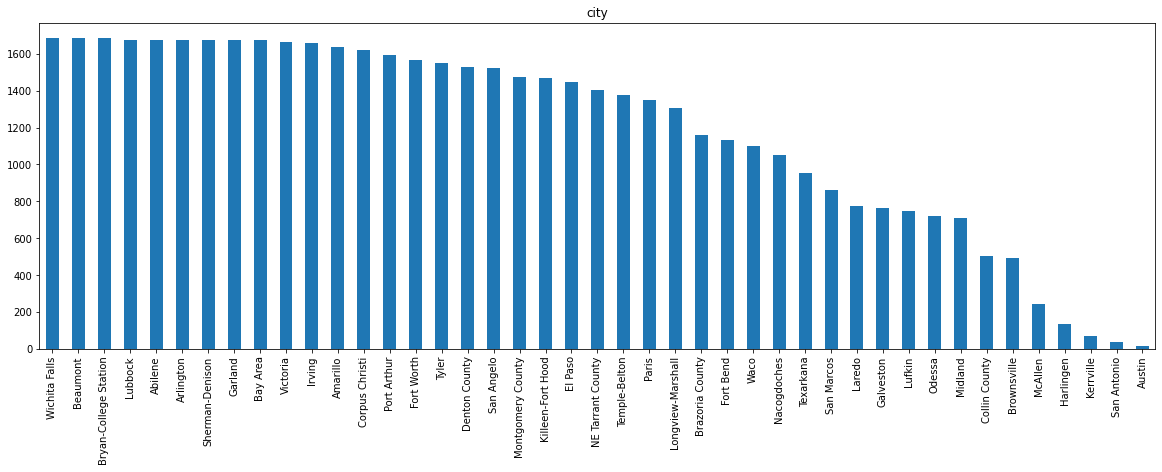

In [313]:
numerical_features = ['sales', 'volume', 'median', 'listings', 'inventory']
categorical_features = ['city', 'year', 'month']

feature = categorical_features[0]#kolom city
count = texasHouses[feature].value_counts() # hitung banyak city
plt.figure(figsize =(20,6))
count.plot(kind='bar', title=feature);

**BANYAK PENJUALAN RUMAH DI KOTA DAERAH TEXAS DARI TAHUN 2003 - 2015**

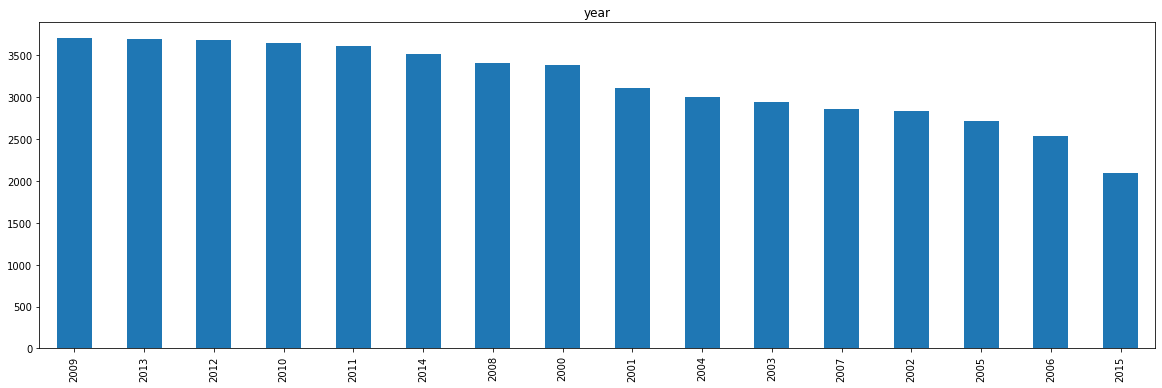

In [314]:
feature = categorical_features[1]
count = texasHouses[feature].value_counts()
plt.figure(figsize =(20,6))
count.plot(kind='bar', title=feature);

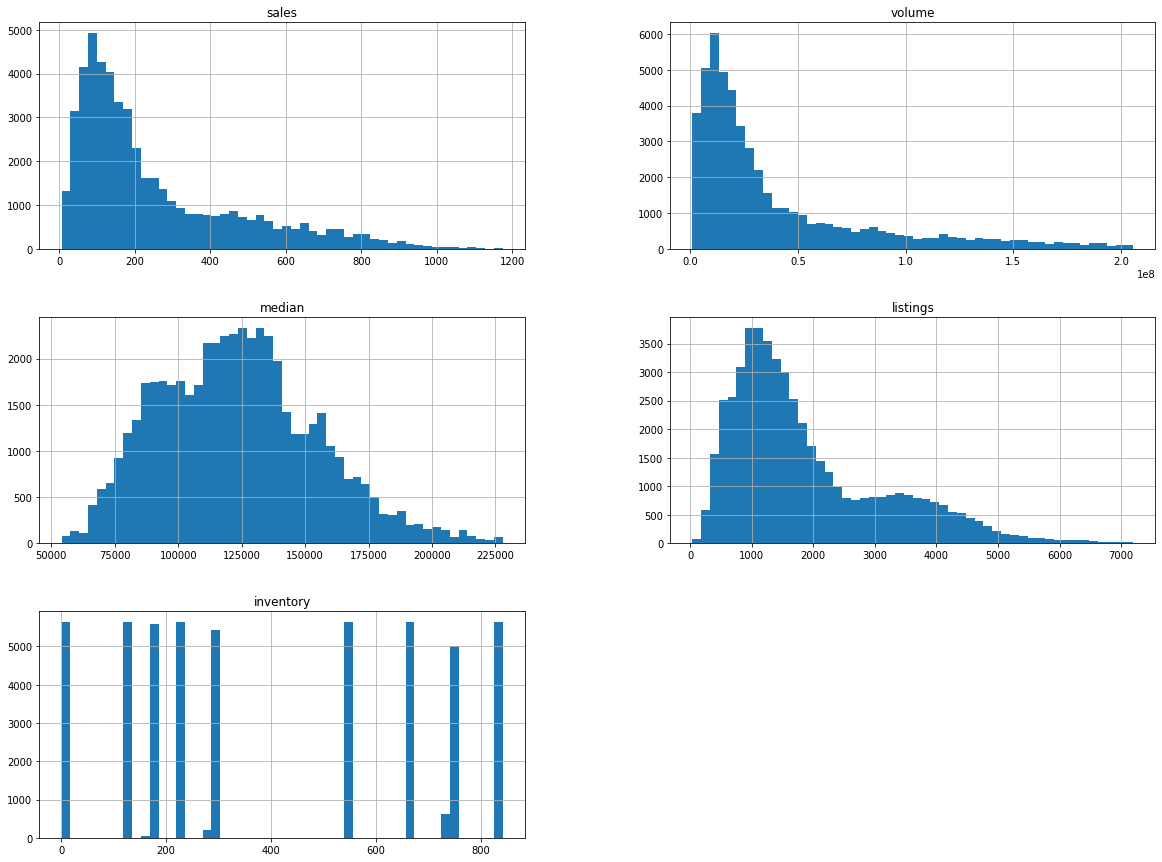

In [315]:
texasHouses.hist(bins=50, figsize=(20,15))
plt.show()

Text(0.5, 1.0, "Rata-rata 'sales' Relatif terhadap Kota-kota di texas")

<Figure size 3600x3600 with 0 Axes>

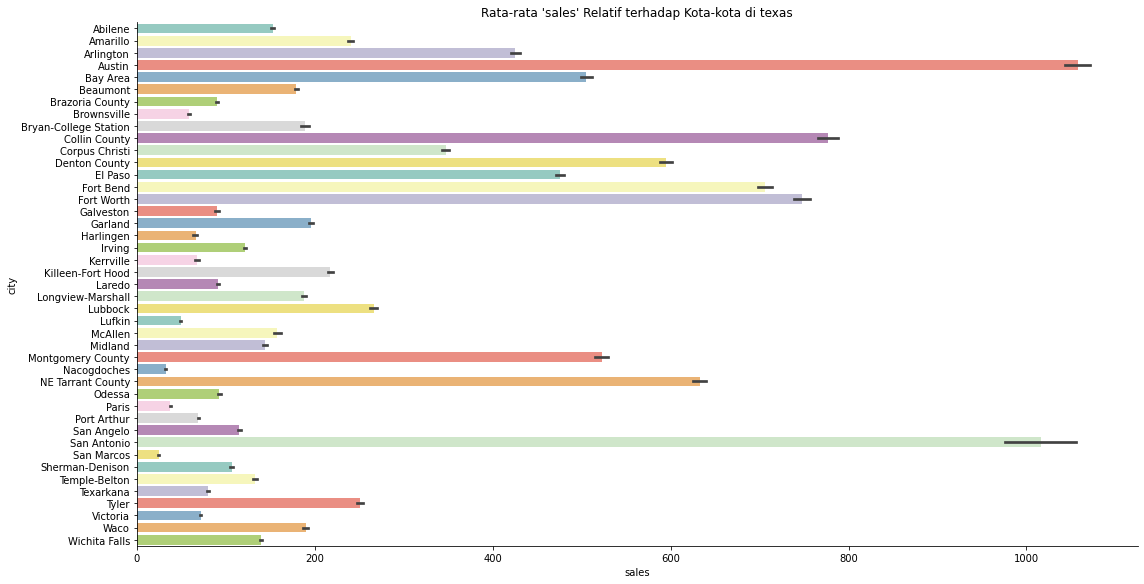

In [316]:
plt.figure(figsize =(50,50))
sns.catplot(x="sales", y="city", dodge = False, kind="bar", height = 8, aspect = 2, data=texasHouses, palette="Set3")
plt.title("Rata-rata 'sales' Relatif terhadap Kota-kota di texas")

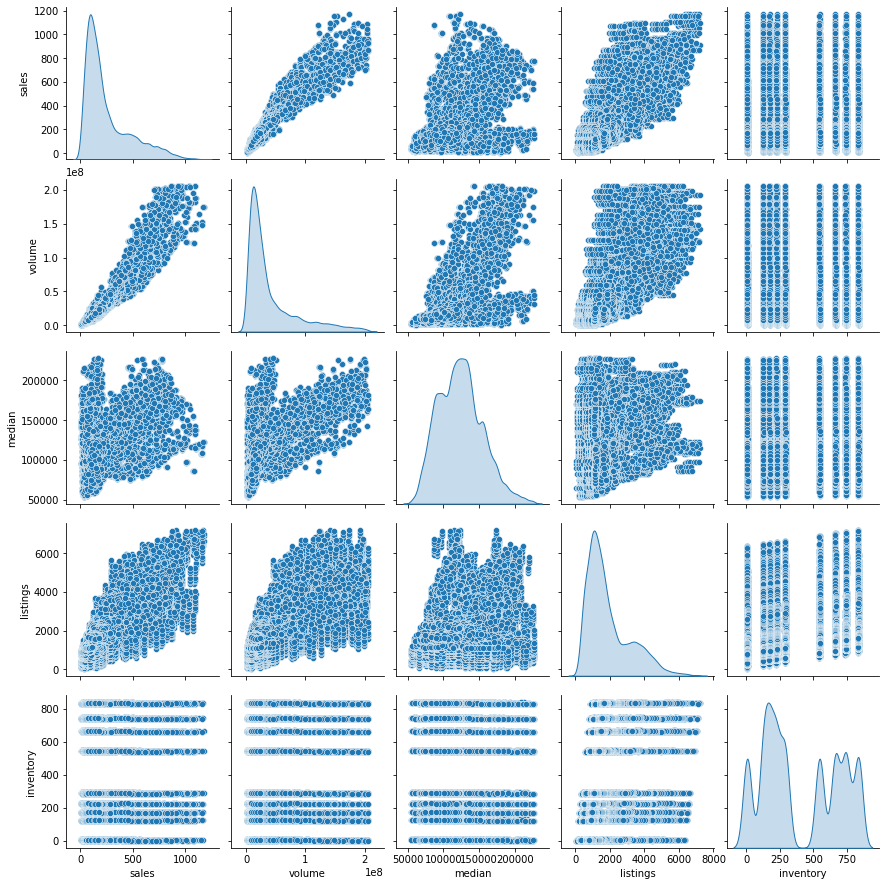

In [317]:
# mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(texasHouses, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

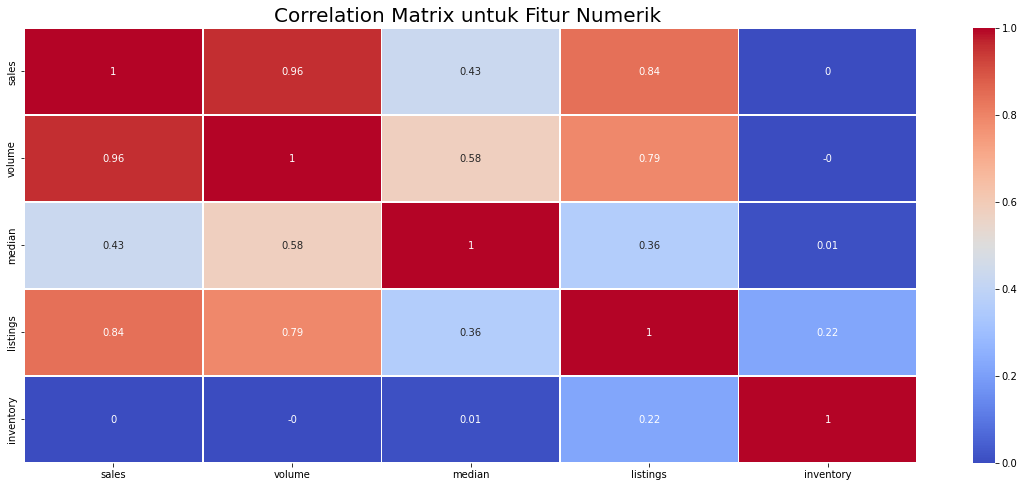

In [318]:
plt.figure(figsize=(20, 8))
correlation_matrix = texasHouses.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

**MENGDROP KOLOM INVENTORY KARENA MEMILIKI KORELASI RENDAH DENGAN FITUR NUMERIK**

In [319]:
texasHouses.drop(['inventory'], inplace=True, axis=1)
texasHouses.head()

,city,year,month,sales,volume,median,listings
0,Abilene,2000,1,72.0,5380000.0,71400.0,701.0
1,Abilene,2000,2,98.0,6505000.0,58700.0,746.0
2,Abilene,2000,3,130.0,9285000.0,58100.0,784.0
3,Abilene,2000,4,98.0,9730000.0,68600.0,785.0
4,Abilene,2000,5,141.0,10590000.0,67300.0,794.0


In [320]:
texasHouses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50742 entries, 0 to 50741
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      50742 non-null  object 
 1   year      50742 non-null  object 
 2   month     50742 non-null  object 
 3   sales     50742 non-null  float64
 4   volume    50742 non-null  float64
 5   median    50742 non-null  float64
 6   listings  50742 non-null  float64
dtypes: float64(4), object(3)
memory usage: 2.7+ MB


#ENCODING

In [321]:
from sklearn.preprocessing import  OneHotEncoder
texasHouses = pd.concat([texasHouses, pd.get_dummies(texasHouses['city'], prefix='city', drop_first=True)],axis=1)
texasHouses = pd.concat([texasHouses, pd.get_dummies(texasHouses['year'], prefix='year', drop_first=True)],axis=1)
texasHouses = pd.concat([texasHouses, pd.get_dummies(texasHouses['month'], prefix='month', drop_first=True)],axis=1)
texasHouses.drop(['city','year','month'], axis=1, inplace=True)
texasHouses.head()

,sales,volume,median,listings,city_Amarillo,city_Arlington,city_Austin,city_Bay Area,city_Beaumont,city_Brazoria County,city_Brownsville,city_Bryan-College Station,city_Collin County,city_Corpus Christi,city_Denton County,city_El Paso,city_Fort Bend,city_Fort Worth,city_Galveston,city_Garland,city_Harlingen,city_Irving,city_Kerrville,city_Killeen-Fort Hood,city_Laredo,city_Longview-Marshall,city_Lubbock,city_Lufkin,city_McAllen,city_Midland,city_Montgomery County,city_NE Tarrant County,city_Nacogdoches,city_Odessa,city_Paris,city_Port Arthur,city_San Angelo,city_San Antonio,city_San Marcos,city_Sherman-Denison,city_Temple-Belton,city_Texarkana,city_Tyler,city_Victoria,city_Waco,city_Wichita Falls,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,72.0,5380000.0,71400.0,701.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,98.0,6505000.0,58700.0,746.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,130.0,9285000.0,58100.0,784.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,98.0,9730000.0,68600.0,785.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,141.0,10590000.0,67300.0,794.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [322]:
from sklearn.model_selection import train_test_split

X = texasHouses[["volume", "median", "listings"]]
y= texasHouses["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state = 27)

In [323]:
X

,volume,median,listings
0,5380000.0,71400.0,701.0
1,6505000.0,58700.0,746.0
2,9285000.0,58100.0,784.0
3,9730000.0,68600.0,785.0
4,10590000.0,67300.0,794.0
...,...,...,...
50737,16717412.0,90028.0,1646.0
50738,15483022.0,106128.0,1588.0
50739,19189009.0,100828.0,1604.0
50740,18821580.0,119628.0,1598.0


In [324]:
y

0         72.0
1         98.0
2        130.0
3         98.0
4        141.0
         ...  
50737    154.0
50738    131.0
50739    176.0
50740    145.0
50741    174.0
Name: sales, Length: 50742, dtype: float64

In [325]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 50742
Total # of sample in train dataset: 45667
Total # of sample in test dataset: 5075


#EVALUATION

In [326]:
# Siapkan daraframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'BoostingADA', 'BoostingGR'])

In [327]:
y_train.isnull().sum()

0

##**MODEL DEV DENGAN KNN**

In [328]:
from sklearn.neighbors import KNeighborsRegressor
 
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

In [329]:
y_pred_knn

array([172.05, 412.  , 193.7 , ...,  43.65,  61.2 , 433.55])

##**MODEL DEV DENGAN RANDOM FOREST**

In [330]:
# Impor library yang dibutuhkan
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth= 19, random_state= 45, n_jobs=-1)
RF.fit(X_train, y_train)
y_pred_RF= RF.predict(X_train)
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [331]:
y_pred_RF

array([168.66959524, 427.09001884, 182.53917991, ...,  38.81374048,
        64.88746679, 415.96      ])

##**MODEL DEV DENGAN ADAPTIVE BOOSTING**

In [332]:
from sklearn.ensemble import AdaBoostRegressor
 
boostingADA = AdaBoostRegressor(n_estimators=35, learning_rate=0.05, random_state= 35)                             
boostingADA.fit(X_train, y_train)
y_pred_AB= boostingADA.predict(X_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boostingADA.predict(X_train), y_true=y_train)

In [333]:
y_pred_AB

array([145.22172949, 454.50762649, 205.8661023 , ...,  69.83595198,
        69.83595198, 454.50762649])

##**MODEL DEV DENGAN GRADIENT BOOSTING**

In [334]:
from sklearn.ensemble import GradientBoostingRegressor

boostingGR = GradientBoostingRegressor(n_estimators=35, learning_rate=0.05, random_state= 35)                             
boostingGR.fit(X_train, y_train)
y_pred_GB= boostingGR.predict(X_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boostingGR.predict(X_train), y_true=y_train)

In [335]:
y_pred_GB

array([181.18175813, 419.40428943, 202.63260573, ...,  85.75018218,
       106.28917271, 419.40428943])

In [336]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','BoostingADA', 'BoostingGR'])
model_dict = {'KNN': knn, 'RF': RF, 'BoostingADA': boostingADA, 'BoostingGR': boostingGR}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,1.31768,1.37423
RF,0.00295012,0.0133766
BoostingADA,2.88825,2.91715
BoostingGR,2.8599,2.7355


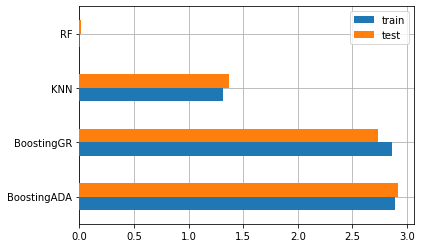

In [337]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [338]:
prediksi = X_test.iloc[:].copy()
pred_dict = {'y_true':y_test[:]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pred_dict = pd.DataFrame(pred_dict)
pred_dict

,y_true,prediksi_KNN,prediksi_RF,prediksi_BoostingADA,prediksi_BoostingGR
224,203.0,186.2,201.7,146.3,195.5
26405,56.0,55.2,54.7,69.8,97.3
33267,215.0,222.8,215.6,223.8,235.3
38145,117.0,119.0,118.4,74.6,130.2
12561,355.0,517.5,355.9,454.5,400.3
...,...,...,...,...,...
28360,181.0,164.6,178.4,155.6,188.7
36984,251.0,269.2,264.9,223.8,256.8
35233,422.0,439.6,423.6,450.3,386.0
32916,78.0,73.9,78.2,69.8,99.6
